# 如何自訂函式、模組及類別?

## 參考資料

* <a href="https://docs.python.org/3.5/tutorial/controlflow.html#defining-functions" target="_blank">Python 3.5 官方教學文件中關於自訂函數的章節</a>
* <a href="https://docs.python.org/3.5/tutorial/modules.html" target="_blank">Python 3.5 官方教學文件中關於模組的章節</a>
* <a href="https://docs.python.org/3.5/tutorial/classes.html" target="_blank">Python 3.5 官方教學文件中關於物件導向與類別的章節</a>
* <a href="http://openhome.cc/Gossip/CodeData/PythonTutorial/FunctionModuleClassPackagePy3.html" target="_blank">Python 3 Tutorial 第三堂（1）函式、模組、類別與套件</a> (by 良葛格)

## 準備工作：範例所需檔案下載及說明

* MAXI_lc_1day-Cyg_X-1.csv 和 MAXI_lc_1orbit-Cyg_X-1.csv (已在資料夾中無須下載)：

  這兩個Cyg X-1光變曲線資料下載自<a href="http://maxi.riken.jp/top/index.php?cid=000000000001&disp_mode=curves" target="_blank">X射線望遠鏡MAXI的官網</a>，分別以1天和90分鐘(1 orbit)取樣。 檔案內容為不同能量區段的光變曲線資料，資料的詳細格式請見<a href="http://maxi.riken.jp/top/index.php?cid=000000000036" target="_blank">MAXI官網的說明</a>。


* 其他範例檔案(待補)

## 範例1-1：自訂專門畫MAXI某段能量區段光變觀測資料的函數

In [1]:
def plot_maxi_lc(filename, band='all', ploterr=True):
    """    
    輸入檔名，畫出MAXI某段能量區段觀測資料的光變曲線。
    
    Parameters
    ----------------   
    filename: 字串
    band: 字串 
          能量區段， 2-20 keV:  'all'(預設)
                   2-4 keV:   'low'
                   4-10 keV:  'mid'
                   10-20 keV: 'high'
    ploterr: 布林值
             是否也把err bar畫出來(預設為True)   
    """
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    lc = ascii.read(filename)
    time = lc['col1']
    rate_2_20keV = lc['col2']
    err_2_20keV = lc['col3']
    rate_2_4keV = lc['col4']
    err_2_4keV = lc['col5']
    rate_4_10keV = lc['col6']
    err_4_10keV = lc['col7']
    rate_10_20keV = lc['col8']
    err_10_20keV = lc['col9']
    rate = {
        'all': [rate_2_20keV, err_2_20keV, '(2-20 keV)'],
        'low': [rate_2_4keV, err_2_4keV, '(2-4 keV)'],
        'mid': [rate_4_10keV, err_4_10keV, '(4-10 keV)'],
        'high': [rate_10_20keV, err_10_20keV, '(10-20 keV)'],        
    }
    if ploterr == True:
        plt.errorbar(time, rate.get(band)[0], yerr=rate.get(band)[1], fmt='.b')
    else:
        plt.plot(time, rate.get(band)[0], '.k')        
    plt.xlabel('Time (MJD)', fontsize=12)
    plt.ylabel('Count rate', fontsize=12)
    plt.title('Cyg X-1 light curve observed by MAXI ' + rate.get(band)[2], fontsize=12)
    plt.show()

In [2]:
# 查看函數用途
plot_maxi_lc?

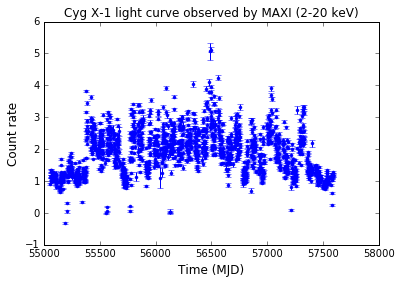

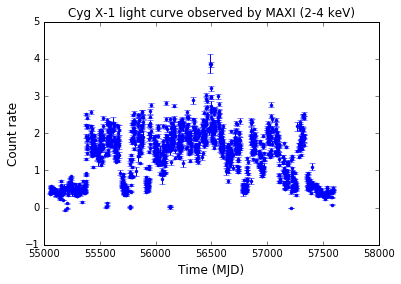

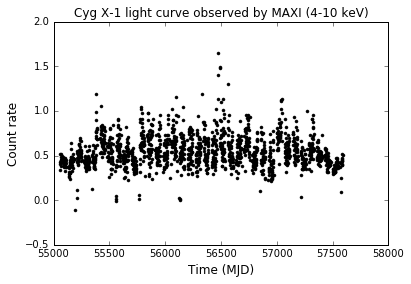

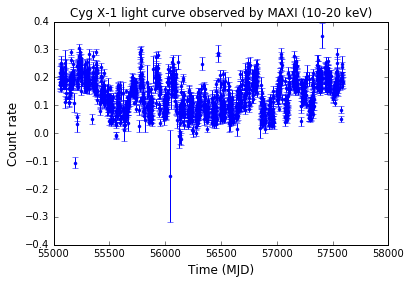

In [3]:
# 此程式區塊為畫出個別能量區段的光變曲線 (每天1個資料點)
%matplotlib inline
lc_1day = "MAXI_lc_1day-Cyg_X-1.csv"
plot_maxi_lc(lc_1day)
plot_maxi_lc(lc_1day, band='low')
plot_maxi_lc(lc_1day, band='mid', ploterr=False)
plot_maxi_lc(lc_1day, band='high')

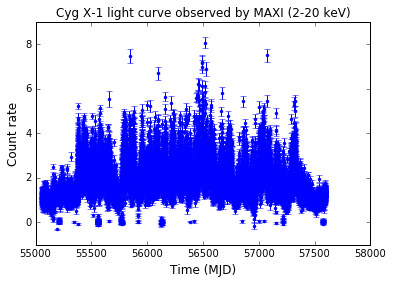

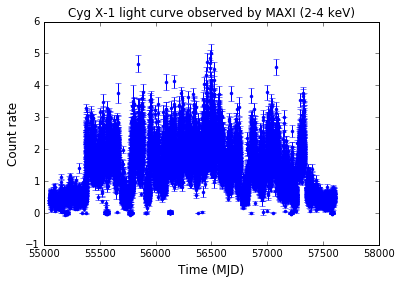

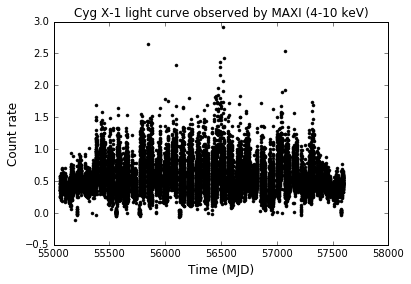

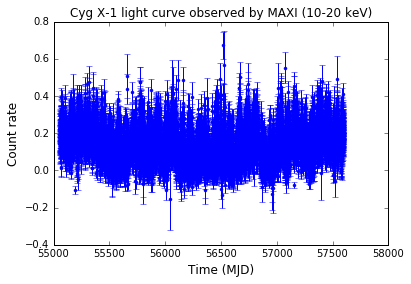

In [4]:
# 此程式區塊為畫出個別能量區段的光變曲線 (90分鐘1個資料點)
lc_1orbit = "MAXI_lc_1orbit-Cyg_X-1.csv"
plot_maxi_lc(lc_1orbit)
plot_maxi_lc(lc_1orbit, band='low')
plot_maxi_lc(lc_1orbit, band='mid', ploterr=False)
plot_maxi_lc(lc_1orbit, band='high')

## 範例1-2：自訂專門畫MAXI所有能量區段光變觀測資料的函數

In [5]:
def plot_maxi_lcs(filename, subplot=False):
    """    
    輸入檔名，將MAXI所有能量區段的光變曲線畫在同一張圖。
    
    Parameters
    ----------------   
    filename: 字串
    subplot: 布林值
             True: 以subplot的型式畫圖
             Flase(預設): 直接把所有光變曲線疊起來               
    """
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    lc = ascii.read(filename)
    time = lc['col1']
    rate_2_20keV = lc['col2']
    err_2_20keV = lc['col3']
    rate_2_4keV = lc['col4']
    err_2_4keV = lc['col5']
    rate_4_10keV = lc['col6']
    err_4_10keV = lc['col7']
    rate_10_20keV = lc['col8']
    err_10_20keV = lc['col9']
    if subplot == False:
        plt.errorbar(time, rate_2_20keV, yerr=err_2_20keV, fmt='.r')
        plt.hold(True)
        plt.errorbar(time, rate_2_4keV, yerr=err_2_4keV, fmt='.b')
        plt.errorbar(time, rate_4_10keV, yerr=err_4_10keV, fmt='.k')
        plt.errorbar(time, rate_10_20keV, yerr=err_10_20keV, fmt='.m')
        plt.hold(False)
        plt.legend(('2-20 keV', '2-4 keV', '4-10 keV', '10-20 keV'))
        plt.ylabel('Count rate', fontsize=12)
        plt.title('Cyg X-1 light curves observed by MAXI', fontsize=12)
    else:
        plt.subplot(411)
        plt.errorbar(time, rate_2_20keV, yerr=err_2_20keV, fmt='.r')
        plt.title('Cyg X-1 light curves observed by MAXI')
        plt.ylabel('2-20 keV')
        plt.xticks([])
        plt.subplot(412)
        plt.errorbar(time, rate_2_4keV, yerr=err_2_4keV, fmt='.b')
        plt.ylabel('2-4 keV')
        plt.xticks([])
        plt.subplot(413)
        plt.errorbar(time, rate_4_10keV, yerr=err_4_10keV, fmt='.k')
        plt.ylabel('4-10 keV')
        plt.xticks([])
        plt.subplot(414)
        plt.errorbar(time, rate_10_20keV, yerr=err_10_20keV, fmt='.m')
        plt.ylabel('10-20 keV')        
    plt.xlabel('Time (MJD)', fontsize=12)    
    plt.show()

In [6]:
# 查看函數用途
plot_maxi_lcs?

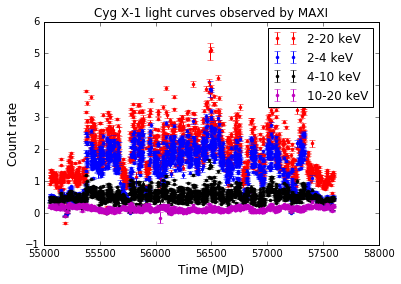

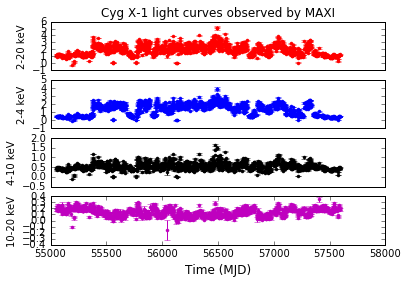

In [7]:
# 此程式區塊為在一張圖上畫出所有能量區段的光變曲線 (每天1個資料點)
%matplotlib inline
lc_1day = "MAXI_lc_1day-Cyg_X-1.csv"
plot_maxi_lcs(lc_1day)
plot_maxi_lcs(lc_1day, True)

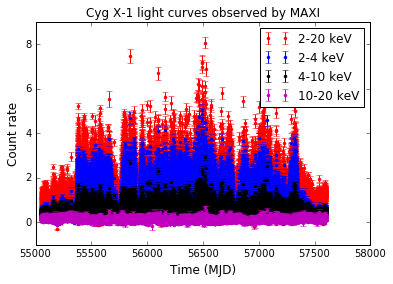

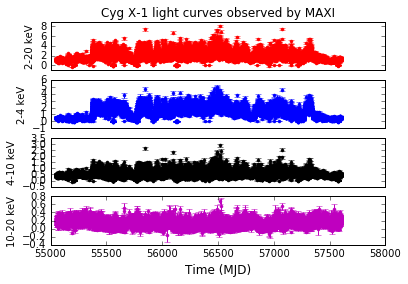

In [8]:
# 此程式區塊為在一張圖上畫出所有能量區段的光變曲線 (90分鐘1個資料點)
lc_1orbit = "MAXI_lc_1orbit-Cyg_X-1.csv"
plot_maxi_lcs(lc_1orbit)
plot_maxi_lcs(lc_1orbit, True)

## 範例1-3：將上例兩個函數寫進一個檔案中，成為可引入的模組

In [9]:
output_string = '''
"""用來畫出MAXI光變觀測資料的模組

可用函數：
- plot_maxi_lc: 畫出MAXI單一能量區段的光變曲線
- plot_maxi_lcs: 畫出MAXI所有能量區段的光變曲線
"""

from astropy.io import ascii
import matplotlib.pyplot as plt

def plot_maxi_lc(filename, band='all', ploterr=True):
    """    
    輸入檔名，畫出MAXI某段能量區段觀測資料的光變曲線。
    
    Parameters
    ----------------   
    filename: 字串
    band: 字串 
          能量區段， 2-20 keV:  'all'(預設)
                   2-4 keV:   'low'
                   4-10 keV:  'mid'
                   10-20 keV: 'high'
    ploterr: 布林值
             是否也把err bar畫出來(預設為True)   
    """
    lc = ascii.read(filename)
    time = lc['col1']
    rate_2_20keV = lc['col2']
    err_2_20keV = lc['col3']
    rate_2_4keV = lc['col4']
    err_2_4keV = lc['col5']
    rate_4_10keV = lc['col6']
    err_4_10keV = lc['col7']
    rate_10_20keV = lc['col8']
    err_10_20keV = lc['col9']
    rate = {
        'all': [rate_2_20keV, err_2_20keV, '(2-20 keV)'],
        'low': [rate_2_4keV, err_2_4keV, '(2-4 keV)'],
        'mid': [rate_4_10keV, err_4_10keV, '(4-10 keV)'],
        'high': [rate_10_20keV, err_10_20keV, '(10-20 keV)'],        
    }
    if ploterr == True:
        plt.errorbar(time, rate.get(band)[0], yerr=rate.get(band)[1], fmt='.b')
    else:
        plt.plot(time, rate.get(band)[0], '.k')        
    plt.xlabel('Time (MJD)', fontsize=12)
    plt.ylabel('Count rate', fontsize=12)
    plt.title('Cyg X-1 light curve observed by MAXI ' + rate.get(band)[2], fontsize=12)
    plt.show()
    
    
def plot_maxi_lcs(filename, subplot=False):
    """    
    輸入檔名，將MAXI所有能量區段的光變曲線畫在同一張圖。
    
    Parameters
    ----------------   
    filename: 字串
    subplot: 布林值
             True: 以subplot的型式畫圖
             Flase(預設): 直接把所有光變曲線疊起來               
    """
    lc = ascii.read(filename)
    time = lc['col1']
    rate_2_20keV = lc['col2']
    err_2_20keV = lc['col3']
    rate_2_4keV = lc['col4']
    err_2_4keV = lc['col5']
    rate_4_10keV = lc['col6']
    err_4_10keV = lc['col7']
    rate_10_20keV = lc['col8']
    err_10_20keV = lc['col9']
    if subplot == False:
        plt.errorbar(time, rate_2_20keV, yerr=err_2_20keV, fmt='.r')
        plt.hold(True)
        plt.errorbar(time, rate_2_4keV, yerr=err_2_4keV, fmt='.b')
        plt.errorbar(time, rate_4_10keV, yerr=err_4_10keV, fmt='.k')
        plt.errorbar(time, rate_10_20keV, yerr=err_10_20keV, fmt='.m')
        plt.hold(False)
        plt.legend(('2-20 keV', '2-4 keV', '4-10 keV', '10-20 keV'))
        plt.ylabel('Count rate', fontsize=12)
        plt.title('Cyg X-1 light curves observed by MAXI', fontsize=12)
    else:
        plt.subplot(411)
        plt.errorbar(time, rate_2_20keV, yerr=err_2_20keV, fmt='.r')
        plt.title('Cyg X-1 light curves observed by MAXI')
        plt.ylabel('2-20 keV')
        plt.xticks([])
        plt.subplot(412)
        plt.errorbar(time, rate_2_4keV, yerr=err_2_4keV, fmt='.b')
        plt.ylabel('2-4 keV')
        plt.xticks([])
        plt.subplot(413)
        plt.errorbar(time, rate_4_10keV, yerr=err_4_10keV, fmt='.k')
        plt.ylabel('4-10 keV')
        plt.xticks([])
        plt.subplot(414)
        plt.errorbar(time, rate_10_20keV, yerr=err_10_20keV, fmt='.m')
        plt.ylabel('10-20 keV')        
    plt.xlabel('Time (MJD)', fontsize=12)    
    plt.show()
'''

output_file = open('maxi_lc.py','w')
output_file.write(output_string)
output_file.close()

In [10]:
# 引入模組並查看該模組的相關說明
import maxi_lc as mlc

mlc?
#mlc.plot_maxi_lc?
#mlc.plot_maxi_lcs?

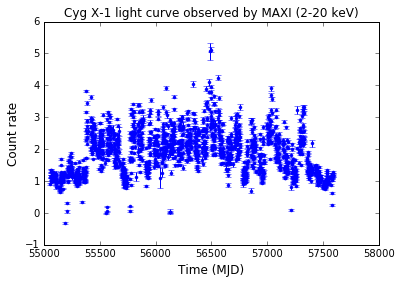

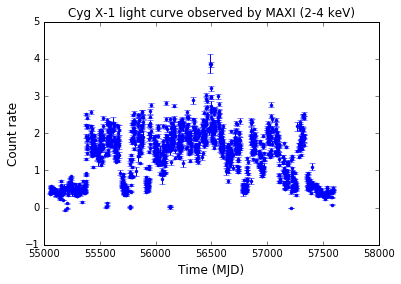

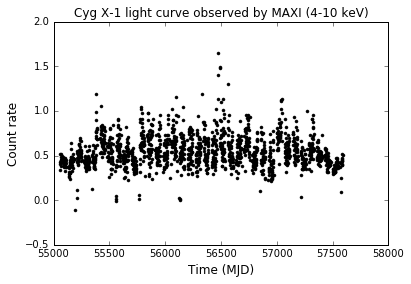

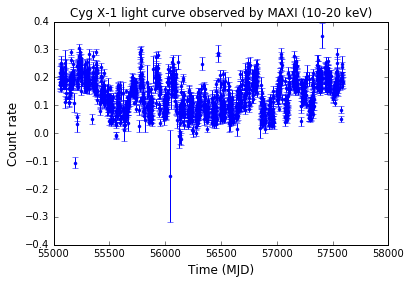

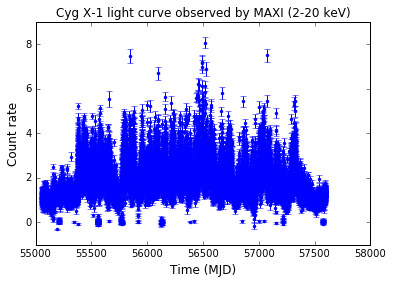

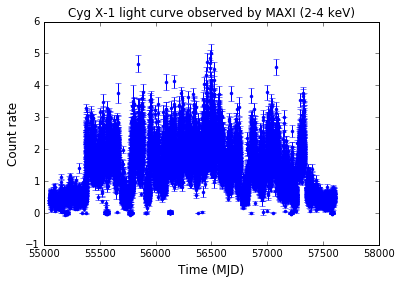

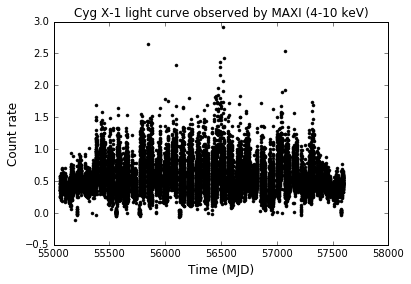

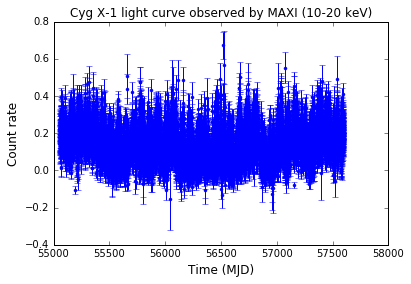

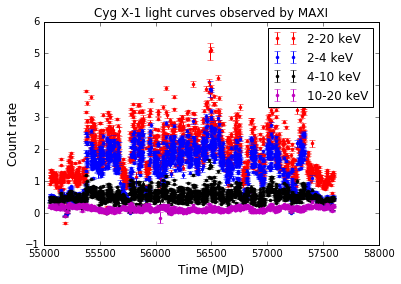

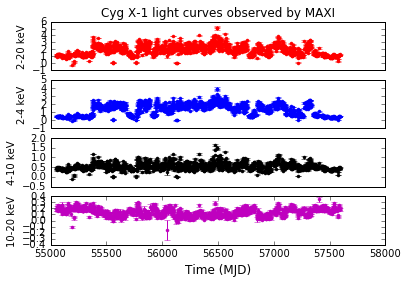

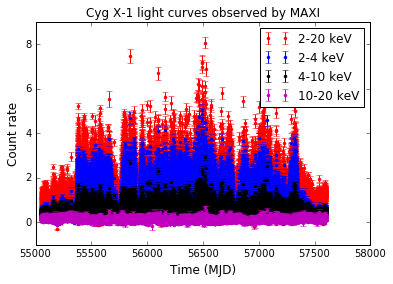

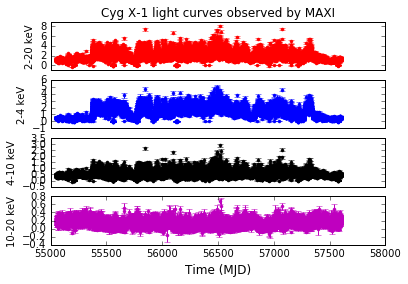

In [11]:
# 使用模組中的函式
lc_1day = "MAXI_lc_1day-Cyg_X-1.csv"
lc_1orbit = "MAXI_lc_1orbit-Cyg_X-1.csv"
%matplotlib inline
mlc.plot_maxi_lc(lc_1day)
mlc.plot_maxi_lc(lc_1day, band='low')
mlc.plot_maxi_lc(lc_1day, band='mid', ploterr=False)
mlc.plot_maxi_lc(lc_1day, band='high')
mlc.plot_maxi_lc(lc_1orbit)
mlc.plot_maxi_lc(lc_1orbit, band='low')
mlc.plot_maxi_lc(lc_1orbit, band='mid', ploterr=False)
mlc.plot_maxi_lc(lc_1orbit, band='high')
mlc.plot_maxi_lcs(lc_1day)
mlc.plot_maxi_lcs(lc_1day, True)
mlc.plot_maxi_lcs(lc_1orbit)
mlc.plot_maxi_lcs(lc_1orbit, True)

In [12]:
# 刪除模組及其相關檔案
import os
import shutil
os.remove('maxi_lc.py')
shutil.rmtree('__pycache__')

## 範例1-4：

## 其他範例：尚待補充有函數回傳值的例子